In [5]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# FONT:
prop = fm.FontProperties(fname='LeagueSpartan-Bold.otf')

# Matplotlib Image Properties
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

# Image library for automatic post-generation
from PIL import Image

from nba_api.stats.endpoints import leaguegamefinder
from nba_api.stats.endpoints import boxscoretraditionalv2

import datetime
from datetime import date
today = date.today()
games = leaguegamefinder.LeagueGameFinder().get_data_frames()[0] 
#gameids = list(set(games[games['GAME_DATE'] == today.strftime('%Y-%m-%d')]['GAME_ID'].values))
#today_games = games[games['GAME_DATE'] == today.strftime('%Y-%m-%d')]

### Uncomment two above and comment the two below
today_games = games[games['GAME_DATE'] == datetime.date(2020, 12, 19).strftime('%Y-%m-%d')]
gameids = list(set(games[games['GAME_DATE'] == datetime.date(2020, 12, 19).strftime('%Y-%m-%d')]['GAME_ID'].values))

boxscores =  boxscoretraditionalv2.BoxScoreTraditionalV2(gameids[1]).get_data_frames()[0]
for i in np.arange(len(gameids)):
    if i != 1:
        boxscores = pd.concat([boxscores, boxscoretraditionalv2.BoxScoreTraditionalV2(gameids[i]).get_data_frames()[0]])

boxscores = boxscores.dropna()
boxscores.sort_values('PTS', ascending=False)

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,START_POSITION,COMMENT,MIN,FGM,...,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
3,0012000047,1610612766,CHA,Charlotte,1628984,Devonte' Graham,G,,31:30,8.0,...,1.0,3.0,4.0,3.0,2.0,0.0,4.0,0.0,25.0,-7.0
4,0012000047,1610612766,CHA,Charlotte,1626179,Terry Rozier,G,,26:48,8.0,...,1.0,4.0,5.0,6.0,1.0,0.0,0.0,2.0,24.0,22.0
19,0012000048,1610612764,WAS,Washington,1628418,Thomas Bryant,C,,24:37,7.0,...,1.0,6.0,7.0,1.0,1.0,0.0,0.0,1.0,22.0,3.0
21,0012000047,1610612753,ORL,Orlando,203932,Aaron Gordon,F,,21:36,6.0,...,3.0,6.0,9.0,3.0,1.0,0.0,1.0,0.0,20.0,16.0
6,0012000049,1610612737,ATL,Atlanta,201568,Danilo Gallinari,,,26:07,4.0,...,1.0,4.0,5.0,0.0,0.0,0.0,1.0,1.0,19.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15,0012000047,1610612766,CHA,Charlotte,1630269,Keandre Cook,,,1:46,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-7.0
11,0012000049,1610612737,ATL,Atlanta,1630219,Skylar Mays,,,3:00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0
12,0012000047,1610612766,CHA,Charlotte,1630208,Nick Richards,,,3:53,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,-4.0
29,0012000048,1610612764,WAS,Washington,1629021,Moritz Wagner,,,6:51,0.0,...,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,3.0


In [6]:
boxscores.columns

Index(['GAME_ID', 'TEAM_ID', 'TEAM_ABBREVIATION', 'TEAM_CITY', 'PLAYER_ID',
       'PLAYER_NAME', 'START_POSITION', 'COMMENT', 'MIN', 'FGM', 'FGA',
       'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB',
       'DREB', 'REB', 'AST', 'STL', 'BLK', 'TO', 'PF', 'PTS', 'PLUS_MINUS'],
      dtype='object')

In [7]:
today_games

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
424,12020,1610612766,CHA,Charlotte Hornets,0012000047,2020-12-19,CHA @ ORL,L,242,117,...,0.864,11,41,52,21,7,6,20,23,-3.0
425,12020,1610612753,ORL,Orlando Magic,0012000047,2020-12-19,ORL vs. CHA,W,241,120,...,0.792,13,37,50,23,7,3,15,14,3.0
426,12020,1610612764,WAS,Washington Wizards,0012000048,2020-12-19,WAS vs. DET,W,241,99,...,0.625,4,41,45,24,14,3,17,14,3.0
427,12020,1610612763,MEM,Memphis Grizzlies,0012000049,2020-12-19,MEM vs. ATL,L,241,116,...,0.744,10,33,43,21,11,8,21,31,3.0
428,12020,1610612765,DET,Detroit Pistons,0012000048,2020-12-19,DET @ WAS,L,241,96,...,0.647,8,43,51,18,12,2,20,19,-3.0
429,12020,1610612737,ATL,Atlanta Hawks,0012000049,2020-12-19,ATL @ MEM,W,239,117,...,0.837,8,39,47,24,8,1,18,28,5.4


In [8]:
def amounts(boxscores, today_games):
    # Entire Outcomes across all day's games
    outcomes_dict = dict(zip(today_games['TEAM_ABBREVIATION'], today_games['WL']))
    matchups_dict = dict(zip(today_games['TEAM_ABBREVIATION'], today_games['MATCHUP']))
    
    # Points leader information
    points_max = max(boxscores['PTS'])
    points_df = boxscores[boxscores['PTS'] == points_max]
    points = len(points_df)
    
    if points == 1:
        points_info = {'function' : 1,
                       'points' : str(int(points_max)),
                       'p_name' : points_df['PLAYER_NAME'].values[0],
                       'pid' : points_df['PLAYER_ID'].values[0],
                       'tid' : points_df['TEAM_ID'].values[0],
                       'tabbrev' : points_df['TEAM_ABBREVIATION'].values[0],
                       'fg' : str(int(points_df['FGM'].values[0])) + '-' + str(int(points_df['FGA'].values[0])) + ' FG',
                       '3pt' : str(int(points_df['FG3M'].values[0])) + '-' + str(int(points_df['FG3A'].values[0])) + ' 3PT',
                       'ft' : str(int(points_df['FTA'].values[0])) + '-' + str(int(points_df['FTM'].values[0])) + ' FT',
                       'outcome': outcomes_dict[points_df['TEAM_ABBREVIATION'].values[0]] + '(' 
                                  + matchups_dict[points_df['TEAM_ABBREVIATION'].values[0]].split(' ')[2] +')'}
        
    if points == 2:
        points_info = {'function': 2,
                       'points' : str(int(points_max)),
                       'player_1' : {'p_name' : points_df['PLAYER_NAME'].values[0],
                                     'pid' : points_df['PLAYER_ID'].values[0],
                                     'tid' : points_df['TEAM_ID'].values[0],
                                     'tabbrev' : points_df['TEAM_ABBREVIATION'].values[0],
                                     'outcome': outcomes_dict[points_df['TEAM_ABBREVIATION'].values[0]] + '(' 
                                                + matchups_dict[points_df['TEAM_ABBREVIATION'].values[0]].split(' ')[2] +')'},
                       'player_2' : {'p_name' : points_df['PLAYER_NAME'].values[1],
                                     'pid' : points_df['PLAYER_ID'].values[1],
                                     'tid' : points_df['TEAM_ID'].values[1],
                                     'tabbrev' : points_df['TEAM_ABBREVIATION'].values[1],
                                     'outcome': outcomes_dict[points_df['TEAM_ABBREVIATION'].values[1]] + '(' 
                                                + matchups_dict[points_df['TEAM_ABBREVIATION'].values[1]].split(' ')[2] +')'}}
        
    if points > 2:
        points_info = {'function' : 3,
                       'points' : str(int(points_max)),
                       'player_1' : points_df['PLAYER_NAME'].values[0],
                       'player_2' : points_df['PLAYER_NAME'].values[1],
                       'player_3' : points_df['PLAYER_NAME'].values[2]}
        
    # Assist leader information
    ast_max = max(boxscores['AST'])
    ast_df = boxscores[boxscores['AST'] == ast_max]
    assists = len(ast_df)
    
    if assists == 1:
        ast_info = {'function' : 1,
                    'asts' : str(int(ast_max)),
                    'p_name' : ast_df['PLAYER_NAME'].values[0],
                    'pid' : ast_df['PLAYER_ID'].values[0],
                    'tid' : ast_df['TEAM_ID'].values[0],
                    'tabbrev' : ast_df['TEAM_ABBREVIATION'].values[0],
                    'tov' : str(int(points_df['TOV'].values[0])) + ' TOV',
                    'outcome': outcomes_dict[points_df['TEAM_ABBREVIATION'].values[0]] + '(' 
                                + matchups_dict[points_df['TEAM_ABBREVIATION'].values[0]].split(' ')[2] +')'}
        
    if assists == 2:
        ast_info = {'function': 2,
                       'asts' : str(int(ast_max)),
                       'player_1' : {'p_name' : ast_df['PLAYER_NAME'].values[0],
                                     'pid' : ast_df['PLAYER_ID'].values[0],
                                     'tid' : ast_df['TEAM_ID'].values[0],
                                     'tabbrev' : ast_df['TEAM_ABBREVIATION'].values[0],
                                     'outcome': outcomes_dict[ast_df['TEAM_ABBREVIATION'].values[0]] + '(' 
                                                + matchups_dict[ast_df['TEAM_ABBREVIATION'].values[0]].split(' ')[2] +')'},
                       'player_2' : {'p_name' : ast_df['PLAYER_NAME'].values[1],
                                     'pid' : ast_df['PLAYER_ID'].values[1],
                                     'tid' : ast_df['TEAM_ID'].values[1],
                                     'tabbrev' : ast_df['TEAM_ABBREVIATION'].values[0],
                                     'outcome': outcomes_dict[ast_df['TEAM_ABBREVIATION'].values[1]] + '(' 
                                                + matchups_dict[ast_df['TEAM_ABBREVIATION'].values[1]].split(' ')[2] +')'}}
        
    if assists > 2:
        ast_info = {'function' : 3,
                    'asts' : str(int(ast_max)),
                    'player_1' : ast_df['PLAYER_NAME'].values[0],
                    'player_2' : ast_df['PLAYER_NAME'].values[1],
                    'player_3' : ast_df['PLAYER_NAME'].values[2]}
        
    # 3PM leader information
    threes_max = max(boxscores['FG3M'])
    threes_df = boxscores[boxscores['FG3M'] == threes_max]
    threes = len(threes_df)
    
    if threes == 1:
        threes_info = {'function' : 1,
                       'threes' : str(int(threes_max)),
                       'p_name' : threes_df['PLAYER_NAME'].values[0],
                       'pid' : threes_df['PLAYER_ID'].values[0],
                       'tid' : threes_df['TEAM_ID'].values[0],
                       'tabbrev' : threes_df['TEAM_ABBREVIATION'].values[0],
                       '3pt' : str(int(threes_df['FG3M'].values[0])) + '-' + str(int(threes_df['FG3A'].values[0])) + ' 3PT',
                       'outcome': outcomes_dict[threes_df['TEAM_ABBREVIATION'].values[0]] + '(' 
                                  + matchups_dict[threes_df['TEAM_ABBREVIATION'].values[0]].split(' ')[2] +')'}
        
    if threes == 2:
        threes_info = {'function': 2,
                       'threes' : str(int(threes_max)),
                       'player_1' : {'p_name' : threes_df['PLAYER_NAME'].values[0],
                                     'pid' : threes_df['PLAYER_ID'].values[0],
                                     'tid' : threes_df['TEAM_ID'].values[0],
                                     'tabbrev' : threes_df['TEAM_ABBREVIATION'].values[0],
                                     'outcome': outcomes_dict[threes_df['TEAM_ABBREVIATION'].values[0]] + '(' 
                                                + matchups_dict[threes_df['TEAM_ABBREVIATION'].values[0]].split(' ')[2] +')'},
                       'player_2' : {'p_name' : threes_df['PLAYER_NAME'].values[1],
                                     'pid' : threes_df['PLAYER_ID'].values[1],
                                     'tid' : threes_df['TEAM_ID'].values[1],
                                     'tabbrev' : threes_df['TEAM_ABBREVIATION'].values[1],
                                     'outcome': outcomes_dict[threes_df['TEAM_ABBREVIATION'].values[1]] + '(' 
                                                + matchups_dict[threes_df['TEAM_ABBREVIATION'].values[1]].split(' ')[2] +')'}}
        
    if threes > 2:
        threes_info = {'function' : 3,
                       'threes' : str(int(threes_max)),
                       'player_1' : threes_df['PLAYER_NAME'].values[0],
                       'player_2' : threes_df['PLAYER_NAME'].values[1],
                       'player_3' : threes_df['PLAYER_NAME'].values[2]}
        
    # Rebound leader information
    reb_max = max(boxscores['REB'])
    reb_df = boxscores[boxscores['REB'] == reb_max]
    rebounds = len(reb_df)
    
    if rebounds == 1:
        reb_info = {'function' : 1,
                    'rebs' : str(int(reb_max)),
                    'p_name' : reb_df['PLAYER_NAME'].values[0],
                    'pid' : reb_df['PLAYER_ID'].values[0],
                    'tid' : reb_df['TEAM_ID'].values[0],
                    'tabbrev' : reb_df['TEAM_ABBREVIATION'].values[0],
                    'outcome': outcomes_dict[reb_df['TEAM_ABBREVIATION'].values[0]] + '(' 
                                + matchups_dict[reb_df['TEAM_ABBREVIATION'].values[0]].split(' ')[2] +')'}
        
    if rebounds == 2:
        reb_info = {'function': 2,
                    'rebs' : str(int(reb_max)),
                    'player_1' : {'p_name' : reb_df['PLAYER_NAME'].values[0],
                                  'pid' : reb_df['PLAYER_ID'].values[0],
                                  'tid' : reb_df['TEAM_ID'].values[0],
                                  'tabbrev' : reb_df['TEAM_ABBREVIATION'].values[0],
                                  'outcome': outcomes_dict[reb_df['TEAM_ABBREVIATION'].values[0]] + '(' 
                                             + matchups_dict[reb_df['TEAM_ABBREVIATION'].values[0]].split(' ')[2] +')'},
                    'player_2' : {'p_name' : reb_df['PLAYER_NAME'].values[1],
                                  'pid' : reb_df['PLAYER_ID'].values[1],
                                  'tid' : reb_df['TEAM_ID'].values[1],
                                  'tabbrev' : reb_df['TEAM_ABBREVIATION'].values[1],
                                  'outcome': outcomes_dict[reb_df['TEAM_ABBREVIATION'].values[1]] + '(' 
                                             + matchups_dict[reb_df['TEAM_ABBREVIATION'].values[1]].split(' ')[2] +')'}}
        
    if rebounds > 2:
        reb_info = {'function' : 3,
                    'rebs' : str(int(reb_max)),
                    'player_1' : reb_df['PLAYER_NAME'].values[0],
                    'player_2' : reb_df['PLAYER_NAME'].values[1],
                    'player_3' : reb_df['PLAYER_NAME'].values[2]}

    # Steals leader information
    stl_max = max(boxscores['STL'])
    stl_df = boxscores[boxscores['STL'] == stl_max]
    steals = len(reb_df)
    
    if steals == 1:
        stl_info = {'function' : 1,
                    'stls' : str(int(stl_max)),
                    'p_name' : stl_df['PLAYER_NAME'].values[0],
                    'pid' : stl_df['PLAYER_ID'].values[0],
                    'tid' : stl_df['TEAM_ID'].values[0],
                    'tabbrev' : stl_df['TEAM_ABBREVIATION'].values[0],
                    'outcome': outcomes_dict[stl_df['TEAM_ABBREVIATION'].values[0]] + '(' 
                                + matchups_dict[stl_df['TEAM_ABBREVIATION'].values[0]].split(' ')[2] +')'}
        
    if steals == 2:
        stl_info = {'function': 2,
                    'stls' : str(int(stl_max)),
                    'player_1' : {'p_name' : stl_df['PLAYER_NAME'].values[0],
                                  'pid' : stl_df['PLAYER_ID'].values[0],
                                  'tid' : stl_df['TEAM_ID'].values[0],
                                  'tabbrev' : stl_df['TEAM_ABBREVIATION'].values[0],
                                  'outcome': outcomes_dict[stl_df['TEAM_ABBREVIATION'].values[0]] + '(' 
                                             + matchups_dict[stl_df['TEAM_ABBREVIATION'].values[0]].split(' ')[2] +')'},
                    'player_2' : {'p_name' : stl_df['PLAYER_NAME'].values[1],
                                  'pid' : stl_df['PLAYER_ID'].values[1],
                                  'tid' : stl_df['TEAM_ID'].values[1],
                                  'tabbrev' : stl_df['TEAM_ABBREVIATION'].values[1],
                                  'outcome': outcomes_dict[stl_df['TEAM_ABBREVIATION'].values[1]] + '(' 
                                             + matchups_dict[stl_df['TEAM_ABBREVIATION'].values[1]].split(' ')[2] +')'}}
        
    if steals > 2:
        stl_info = {'function' : 3,
                    'stls' : str(int(stl_max)),
                    'player_1' : stl_df['PLAYER_NAME'].values[0],
                    'player_2' : stl_df['PLAYER_NAME'].values[1],
                    'player_3' : stl_df['PLAYER_NAME'].values[2]}
        
    # Blocks leader information
    blk_max = max(boxscores['BLK'])
    blk_df = boxscores[boxscores['BLK'] == blk_max]
    blocks = len(blk_df)
    
    if blocks == 1:
        blk_info = {'function' : 1,
                    'blks' : str(int(blk_max)),
                    'p_name' : blk_df['PLAYER_NAME'].values[0],
                    'pid' : blk_df['PLAYER_ID'].values[0],
                    'tid' : blk_df['TEAM_ID'].values[0],
                    'tabbrev' : blk_df['TEAM_ABBREVIATION'].values[0],
                    'outcome': outcomes_dict[blk_df['TEAM_ABBREVIATION'].values[0]] + '(' 
                                + matchups_dict[blk_df['TEAM_ABBREVIATION'].values[0]].split(' ')[2] +')'}
        
    if blocks == 2:
        blk_info = {'function': 2,
                    'blks' : str(int(blk_max)),
                    'player_1' : {'p_name' : blk_df['PLAYER_NAME'].values[0],
                                  'pid' : blk_df['PLAYER_ID'].values[0],
                                  'tid' : blk_df['TEAM_ID'].values[0],
                                  'tabbrev' : blk_df['TEAM_ABBREVIATION'].values[0],
                                  'outcome': outcomes_dict[blk_df['TEAM_ABBREVIATION'].values[0]] + '(' 
                                             + matchups_dict[blk_df['TEAM_ABBREVIATION'].values[0]].split(' ')[2] +')'},
                    'player_2' : {'p_name' : blk_df['PLAYER_NAME'].values[1],
                                  'pid' : blk_df['PLAYER_ID'].values[1],
                                  'tid' : blk_df['TEAM_ID'].values[1],
                                  'tabbrev' : blk_df['TEAM_ABBREVIATION'].values[1],
                                  'outcome': outcomes_dict[blk_df['TEAM_ABBREVIATION'].values[1]] + '(' 
                                             + matchups_dict[blk_df['TEAM_ABBREVIATION'].values[1]].split(' ')[2] +')'}}
        
    if blocks > 2:
        blk_info = {'function' : 3,
                    'blks' : str(int(blk_max)),
                    'player_1' : blk_df['PLAYER_NAME'].values[0],
                    'player_2' : blk_df['PLAYER_NAME'].values[1],
                    'player_3' : blk_df['PLAYER_NAME'].values[2]}
    
    return points_info, ast_info, threes_info, reb_info, stl_info, blk_info

In [9]:
# box score for game:
viz_dict = amounts(boxscores, today_games)
viz_dict

({'function': 1,
  'points': '25',
  'p_name': "Devonte' Graham",
  'pid': 1628984,
  'tid': 1610612766,
  'tabbrev': 'CHA',
  'fg': '8-15 FG',
  '3pt': '6-11 3PT',
  'ft': '3-3 FT',
  'outcome': 'L(ORL)'},
 {'function': 2,
  'asts': '8',
  'player_1': {'p_name': 'Ish Smith',
   'pid': 202397,
   'tid': 1610612764,
   'tabbrev': 'WAS',
   'outcome': 'W(DET)'},
  'player_2': {'p_name': 'Ja Morant',
   'pid': 1629630,
   'tid': 1610612763,
   'tabbrev': 'WAS',
   'outcome': 'L(ATL)'}},
 {'function': 1,
  'threes': '6',
  'p_name': "Devonte' Graham",
  'pid': 1628984,
  'tid': 1610612766,
  'tabbrev': 'CHA',
  '3pt': '6-11 3PT',
  'outcome': 'L(ORL)'},
 {'function': 1,
  'rebs': '15',
  'p_name': 'Miles Bridges',
  'pid': 1628970,
  'tid': 1610612766,
  'tabbrev': 'CHA',
  'outcome': 'L(ORL)'},
 {'function': 1,
  'stls': '4',
  'p_name': 'Trae Young',
  'pid': 1629027,
  'tid': 1610612737,
  'tabbrev': 'ATL',
  'outcome': 'W(MEM)'},
 {'function': 1,
  'blks': '4',
  'p_name': 'Jonas Valan

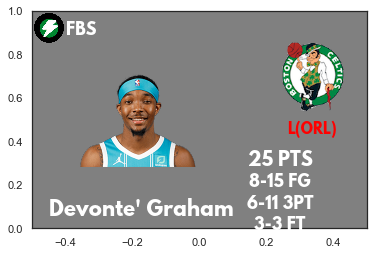

In [35]:
# Creating points graphic:
sns.set(style='white', rc={'axes.facecolor':'gray'})
fig = plt.figure(figsize=(6,4))
ax=fig.add_subplot(1,1,1)
ax.set_xlim(-0.5, 0.5)
ax.set_ylim(0, 1)

# FBS
plt.text(-0.40, 0.890, 'FBS', fontproperties=prop, size=16, color = 'White');

# Adding FBS Logo:
logo = plt.imread('logo.png') 
ax.add_artist(AnnotationBbox(OffsetImage(logo, zoom=0.20), (-0.45, 0.920), frameon=False, pad=0.5));

# Player Name
plt.text(-0.45, 0.06, viz_dict[0]['p_name'], fontproperties=prop, size=20, color = 'White');

# Player Picture
url = 'https://ak-static.cms.nba.com/wp-content/uploads/headshots/nba/' + str(viz_dict[0]['tid']) + '/2020/260x190/' + str(viz_dict[0]['pid']) + '.png'    
player = plt.imread(url) 
ax.add_artist(AnnotationBbox(OffsetImage(player, zoom=0.5), (-0.18, 0.5), frameon=False, pad=0.5))

# Stats
plt.text(0.24, 0.315, viz_dict[0]['points'] + ' PTS', fontproperties=prop, size=18, color = 'White',
         horizontalalignment='center', verticalalignment='center');
plt.text(0.24, 0.215, viz_dict[0]['fg'], fontproperties=prop, size=16, color = 'White',
         horizontalalignment='center', verticalalignment='center');
plt.text(0.24, 0.115, viz_dict[0]['3pt'], fontproperties=prop, size=16, color = 'White',
         horizontalalignment='center', verticalalignment='center');
plt.text(0.24, 0.015, viz_dict[0]['ft'], fontproperties=prop, size=16, color = 'White',
         horizontalalignment='center', verticalalignment='center');

# outcome text
wl_col='red'
if viz_dict[0]['outcome'][0] == 'W':
    wl_col = 'green'
plt.text(0.26, 0.435, viz_dict[0]['outcome'], fontproperties=prop, size=14, color = wl_col);

# Team Logo   
team = plt.imread('newlogos/BOS.png')
#team = plt.imread('https://a.espncdn.com/i/teamlogos/nba/500/lac.png')
ax.add_artist(AnnotationBbox(OffsetImage(team, zoom=.7), (0.335, 0.7), frameon=False))

# Points
#plt.text(0.20, 0.20, points + ' PTS', fontproperties=prop, size=18, color = 'White');
plt.savefig('hi.png')

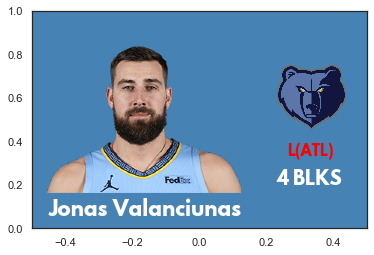

In [30]:
# Creating points graphic:
sns.set(style='white', rc={'axes.facecolor':'steelblue'})
fig = plt.figure(figsize=(6,4))
ax=fig.add_subplot(1,1,1)
ax.set_xlim(-0.5, 0.5)
ax.set_ylim(0, 1)

# Player Name
plt.text(-0.45, 0.06, viz_dict[5]['p_name'], fontproperties=prop, size=20, color = 'White');

# Player Picture
url = 'https://ak-static.cms.nba.com/wp-content/uploads/headshots/nba/' + str(viz_dict[5]['tid']) + '/2020/260x190/' + str(viz_dict[5]['pid']) + '.png'    
player = plt.imread(url) 
ax.add_artist(AnnotationBbox(OffsetImage(player, zoom=0.775), (-0.18, 0.5), frameon=False, pad=0.5))

# Stats
plt.text(0.23, 0.2, viz_dict[5]['blks'] + ' BLKS', fontproperties=prop, size=18, color = 'White');

# outcome text
wl_col='red'
if viz_dict[5]['outcome'][0] == 'W':
    wl_col = 'green'
plt.text(0.26, 0.335, viz_dict[5]['outcome'], fontproperties=prop, size=14, color = wl_col);

# Team Logo   
team = plt.imread('https://a.espncdn.com/i/teamlogos/nba/500/' + viz_dict[5]['tabbrev'].lower() + '.png')
#team = plt.imread('https://a.espncdn.com/i/teamlogos/nba/500/lac.png')
ax.add_artist(AnnotationBbox(OffsetImage(team, zoom=0.15), (0.335, 0.6), frameon=False))

# Points
#plt.text(0.20, 0.20, points + ' PTS', fontproperties=prop, size=18, color = 'White');
#plt.savefig('hi.png')

https://ak-static.cms.nba.com/wp-content/uploads/headshots/nba/1610612737/2020/260x190/1629027.png


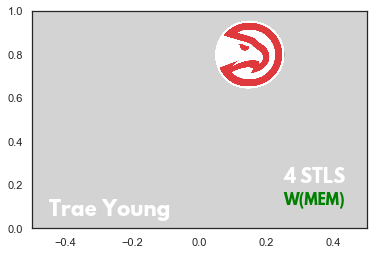

In [44]:
# Creating steals graphic:
sns.set(style='white', rc={'axes.facecolor':'lightgrey'})
fig = plt.figure(figsize=(6,4))
ax=fig.add_subplot(1,1,1)
ax.set_xlim(-0.5, 0.5)
ax.set_ylim(0, 1)

plt.text(-0.45, 0.06, viz_dict[4]['p_name'], fontproperties=prop, size=20, color = 'White');

# Player Picture
url = 'https://ak-static.cms.nba.com/wp-content/uploads/headshots/nba/' + str(viz_dict[4]['tid']) + '/2020/260x190/' + str(viz_dict[4]['pid']) + '.png'
print(url)
#player = plt.imread(url) 
#ax.add_artist(AnnotationBbox(OffsetImage(player, zoom=0.75), (-0.18, 0.5), frameon=False, pad=0.5))

# Stats
plt.text(0.25, 0.21, viz_dict[4]['stls'] + ' STLS', fontproperties=prop, size=18, color = 'White');
#
wl_col='red'
if viz_dict[4]['outcome'][0] == 'W':
    wl_col = 'green'
plt.text(0.25, 0.11, viz_dict[4]['outcome'], fontproperties=prop, size=14, color = wl_col);

# Team Logo   
team = plt.imread('https://a.espncdn.com/i/teamlogos/nba/500/' + viz_dict[4]['tabbrev'].lower() + '.png')
ax.add_artist(AnnotationBbox(OffsetImage(team, zoom=0.15), (0.15, 0.8), frameon=False))

# Points
#plt.text(0.20, 0.20, points + ' PTS', fontproperties=prop, size=18, color = 'White');

In [45]:
# function 2 - assists

# Creating assists graphic:
sns.set(style='white', rc={'axes.facecolor':'lightgrey'})
fig = plt.figure(figsize=(6,4))
ax=fig.add_subplot(1,1,1)
ax.set_xlim(-0.5, 0.5)
ax.set_ylim(0, 1)

plt.text(-0.45, 0.06, viz_dict[4]['p_name'], fontproperties=prop, size=20, color = 'White');

# Player Picture
url = 'https://ak-static.cms.nba.com/wp-content/uploads/headshots/nba/' + str(viz_dict[4]['tid']) + '/2020/260x190/' + str(viz_dict[4]['pid']) + '.png'
print(url)
#player = plt.imread(url) 
#ax.add_artist(AnnotationBbox(OffsetImage(player, zoom=0.75), (-0.18, 0.5), frameon=False, pad=0.5))

# Stats
plt.text(0.25, 0.21, viz_dict[4]['stls'] + ' STLS', fontproperties=prop, size=18, color = 'White');
#
wl_col='red'
if viz_dict[4]['outcome'][0] == 'W':
    wl_col = 'green'
plt.text(0.25, 0.11, viz_dict[4]['outcome'], fontproperties=prop, size=14, color = wl_col);

# Team Logo   
team = plt.imread('https://a.espncdn.com/i/teamlogos/nba/500/' + viz_dict[4]['tabbrev'].lower() + '.png')
ax.add_artist(AnnotationBbox(OffsetImage(team, zoom=0.15), (0.15, 0.8), frameon=False))

# Points
#plt.text(0.20, 0.20, points + ' PTS', fontproperties=prop, size=18, color = 'White');

FileNotFoundError: [Errno 2] No such file or directory: 'https://cdn.nba.com/logos/nba/1610612748/primary/D/logo.svg'